       Unnamed: 0  RedMeat  WhiteMeat  Eggs  Milk  Fish  Cereals  Starch  \
0         Albania     10.1        1.4   0.5   8.9   0.2     42.3     0.6   
1         Austria      8.9       14.0   4.3  19.9   2.1     28.0     3.6   
2         Belgium     13.5        9.3   4.1  17.5   4.5     26.6     5.7   
3        Bulgaria      7.8        6.0   1.6   8.3   1.2     56.7     1.1   
4  Czechoslovakia      9.7       11.4   2.8  12.5   2.0     34.3     5.0   

   Nuts  Fr.Veg  
0   5.5     1.7  
1   1.3     4.3  
2   2.1     4.0  
3   3.7     4.2  
4   1.1     4.0  
Dimensions of the dataset: (25, 10)
Missing values in each column:
 Unnamed: 0    0
RedMeat       0
WhiteMeat     0
Eggs          0
Milk          0
Fish          0
Cereals       0
Starch        0
Nuts          0
Fr.Veg        0
dtype: int64


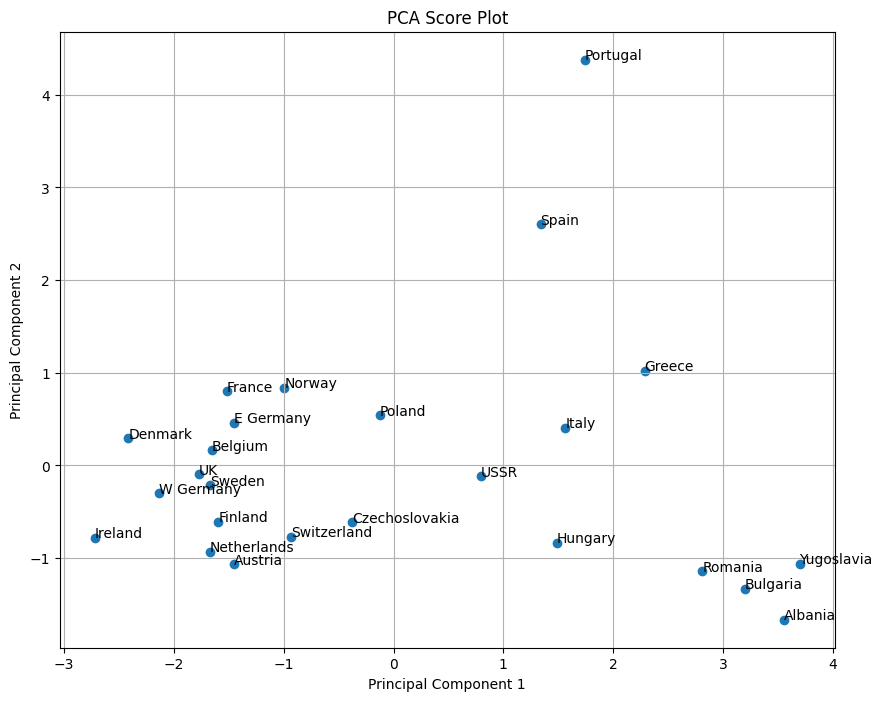

In [7]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Load the dataset
food_data = pd.read_csv('Downloads/food.csv')

# Display the first few rows and get the dimensions
print(food_data.head())
print("Dimensions of the dataset:", food_data.shape)

# Check for missing values
print("Missing values in each column:\n", food_data.isnull().sum())

# Scaling the data using z-transformation
scaler = StandardScaler()
food_scaled = scaler.fit_transform(food_data.iloc[:, 1:])  # Assuming first column is non-numeric labels

# Perform Principal Component Analysis
pca = PCA(n_components=2)  # We only compute the first two principal components for the score plot
principal_components = pca.fit_transform(food_scaled)

# Create a DataFrame for the PCA results
pca_df = pd.DataFrame(data = principal_components, columns = ['PC1', 'PC2'])
pca_df['Country'] = food_data.iloc[:, 0]  # Again, assuming first column is country names

# Plotting the PCA results
plt.figure(figsize=(10,8))
plt.scatter(pca_df['PC1'], pca_df['PC2'])
for i, txt in enumerate(pca_df['Country']):
    plt.annotate(txt, (pca_df['PC1'][i], pca_df['PC2'][i]))
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA Score Plot')
plt.grid(True)
plt.show()
